<a href="https://colab.research.google.com/github/JORDANGAMBA99/Data-Science-Projects/blob/main/Unsupervised_learning_K_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/USArrests.csv')
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
df = pd.read_csv('/content/USArrests.csv',index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [12]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Hopkins Test**

In [13]:
!pip install pyclustertend

In [14]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [15]:
hopkins(scale(df),df.shape[0])

np.float64(0.3852708724157105)

**K means Modelling**

In [16]:
from sklearn.cluster import KMeans

In [17]:
k_means = KMeans(n_clusters = 2, random_state = 42)

In [18]:
k_means.fit(df)

KMeans(n_clusters=2, random_state=42)

In [19]:
clusters = k_means.labels_

In [20]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

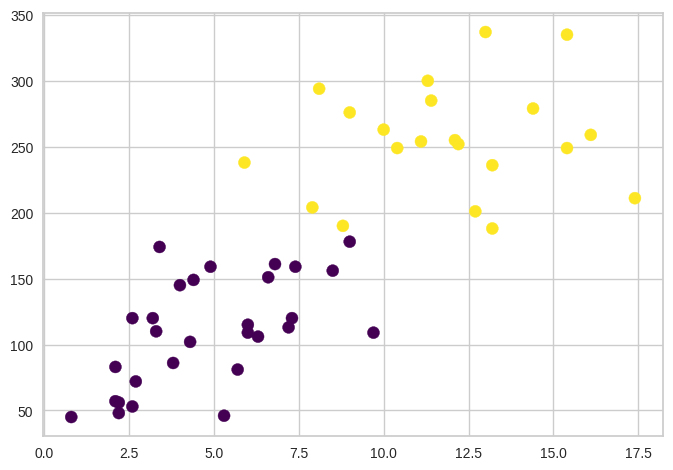

In [21]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c = clusters,s=75,cmap='viridis')

In [22]:
centroids = k_means.cluster_centers_

In [23]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

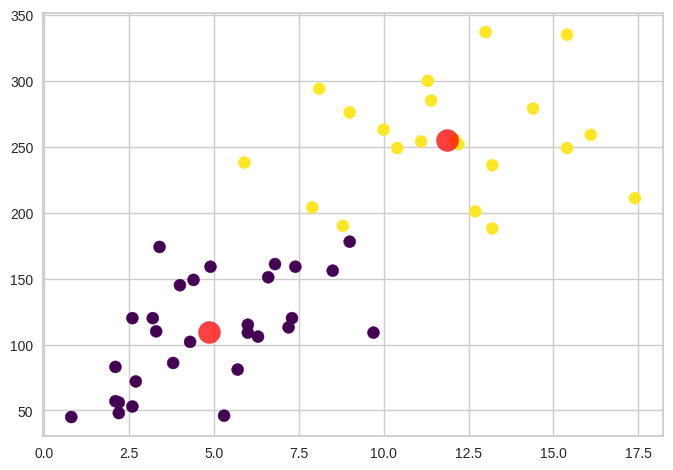

In [24]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c = clusters, s =75,cmap = 'viridis')
plt.scatter(centroids[:,0],centroids[::,1],c = 'red',s =250, alpha = 0.75)

**Elbow Method**

In [25]:
rate = []
K = range(2,10)

for i in K :
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df)
  rate.append(kmeans.inertia_)

In [26]:
rate

[96399.02814449919,
 47964.265357142845,
 37652.659523809525,
 24504.952703296698,
 22669.123220779216,
 17530.662047619055,
 14763.990190476192,
 11405.110476190473]

Text(0.5, 1.0, 'Elbow')

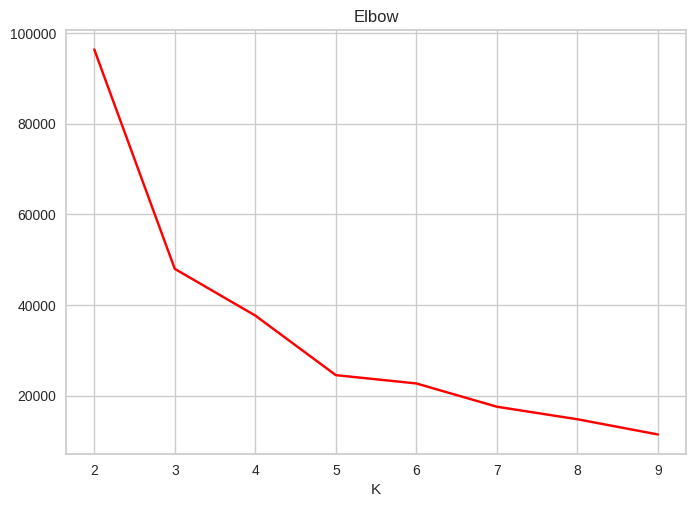

In [27]:
plt.plot(K,rate,'red')
plt.xlabel('K')
plt.title('Elbow')

In [28]:
!pip install yellowbrick

In [29]:
from yellowbrick.cluster import KElbowVisualizer

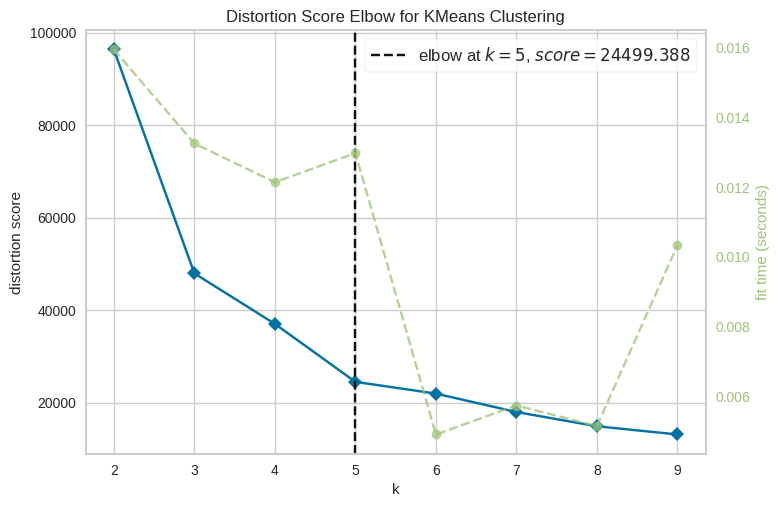

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
kmeans_yellowbrick = KMeans()
graph = KElbowVisualizer(kmeans_yellowbrick,k=(2,10))
graph.fit(df)
graph.poof()

In [31]:
new_kmeans = KMeans(n_clusters = 4, random_state =42)

In [32]:
new_kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [33]:
labels = new_kmeans.labels_

In [34]:
labels

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [35]:
df['cluster.id'] = labels

In [36]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster.id
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


**Silhouette Score**

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
print(f"Silhouette Score(n=4): {silhouette_score(df,labels)}")

Silhouette Score(n=4): 0.5016267918708461


Our Silhouette score is closer to 1. In other words the model is neither very good nor very bad

**The higher the silhouette coefficients closer to +1 the further away the neighbouring cluster instances. The negative values indicates that maybe this instances may have been assigned to the wrong cluster.
By averaging the silhouette coefficients suggest that we can arrive to a global silhouette score that can be used to describe the performance of the entire population with a single value**

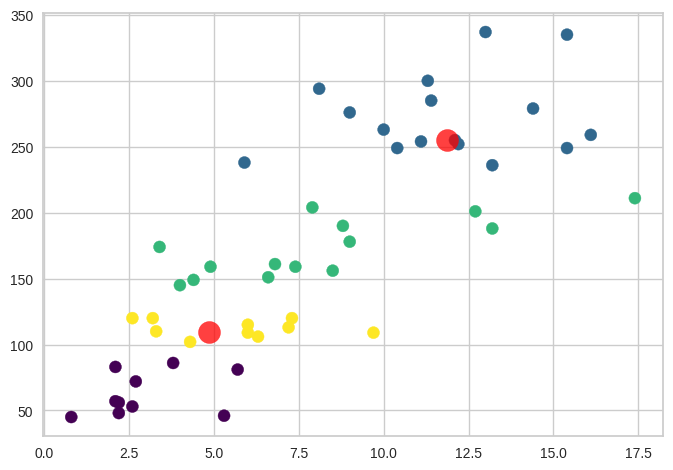

In [39]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c = labels, s =75,cmap = 'viridis')
plt.scatter(centroids[:,0],centroids[::,1],c = 'red',s =250, alpha = 0.75)

**Adjusted Rand Index(ARI)**

In [40]:
from sklearn.metrics.cluster import adjusted_rand_score

In [41]:
new_df = df.sample(15,random_state =42)
new_df

,Murder,Assault,UrbanPop,Rape,cluster.id
States,,,,,
Indiana,7.2,113,65,21.0,3
South Carolina,14.4,279,48,22.5,1
New Mexico,11.4,285,70,32.1,1
Virginia,8.5,156,63,20.7,2
Louisiana,15.4,249,66,22.2,1
Wisconsin,2.6,53,66,10.8,0
Nebraska,4.3,102,62,16.5,3
Montana,6.0,109,53,16.4,3
North Carolina,13.0,337,45,16.1,1


In [42]:
new_df['true_label'] = [1,2,3,0,2,2,1,3,2,0,2,1,1,2,3]

In [43]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster.id,true_label
States,,,,,,
Indiana,7.2,113,65,21.0,3,1
South Carolina,14.4,279,48,22.5,1,2
New Mexico,11.4,285,70,32.1,1,3
Virginia,8.5,156,63,20.7,2,0
Louisiana,15.4,249,66,22.2,1,2
Wisconsin,2.6,53,66,10.8,0,2
Nebraska,4.3,102,62,16.5,3,1
Montana,6.0,109,53,16.4,3,3
North Carolina,13.0,337,45,16.1,1,2


In [45]:
adjusted_rand_score(new_df['true_label'],new_df['cluster.id'])

0.2153846153846154

**The closer the ari is to 1 the better the model is. Our ARI is low meaning there is a problem with the model**